In [2]:
import pandas as pd
# import dask.dataframe as dd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

In [3]:
# BASE_PATH="/lcrc/project/FastBayes/rayandrew/alibaba-data-2017/"
BASE_PATH=Path("~/Data/alibaba-data-2017/")

In [4]:
usage_df = pd.read_csv(BASE_PATH / "container_usage.csv", names=[
    # "timestamp",
    # "event_type",
    # "isntance_id",
    # "machine_id",
    # "cpu_req",
    # "norm_mem_req",
    # "norm_disk_req",

    "time_stamp",
    "instance_id",
    "cpu_util_percent",
    "mem_util_percent",
    "disk_util_percent",
    "avg_cpu_1_min",
    "avg_cpu_5_min",
    "avg_cpu_15_min",
    "avg_cpi",
    "avg_cache_miss",
    "max_cpi",
    "max_cache_miss",
])
usage_df = usage_df.sort_values(by=["time_stamp"]).reset_index(drop=True)

In [5]:
usage_df.head()

,time_stamp,instance_id,cpu_util_percent,mem_util_percent,disk_util_percent,avg_cpu_1_min,avg_cpu_5_min,avg_cpu_15_min,avg_cpi,avg_cache_miss,max_cpi,max_cache_miss
0,39600,8978,13.18,69.460001,15.42,0.66,0.60,0.60,0.148605,0.196024,1.717350,2.671521
1,39600,9713,5.38,23.799999,7.10,0.60,0.50,0.44,0.120713,0.135784,1.657870,2.367960
2,39600,5952,1.50,34.960001,5.20,0.08,0.10,0.10,0.194770,0.266827,2.207530,3.900161
3,39600,7795,3.30,42.900002,16.00,0.22,0.22,0.20,0.183463,0.356302,3.043050,6.297808
4,39600,584,5.92,23.339999,7.50,0.54,0.52,0.50,0.123144,0.132585,1.716867,2.378259


In [6]:
usage_df[usage_df.instance_id == 107] 

,time_stamp,instance_id,cpu_util_percent,mem_util_percent,disk_util_percent,avg_cpu_1_min,avg_cpu_5_min,avg_cpu_15_min,avg_cpi,avg_cache_miss,max_cpi,max_cache_miss
8756,39600,107,3.34,24.080000,5.18,0.24,0.20,0.2,0.15543,0.550153,2.211467,12.187318
10545,39900,107,3.16,24.020000,5.20,0.22,0.20,0.2,0.15543,0.550153,2.211467,12.187318
21026,40200,107,3.28,24.000000,5.20,0.28,0.20,0.2,0.15543,0.550153,2.211467,12.187318
38592,40500,107,3.12,24.000000,5.14,0.22,0.22,0.2,0.15543,0.550153,2.211467,12.187318
42236,40800,107,3.22,24.000000,5.10,0.22,0.20,0.2,0.15543,0.550153,2.211467,12.187318
...,...,...,...,...,...,...,...,...,...,...,...,...
1434468,81300,107,2.66,24.200001,6.30,0.04,0.06,0.1,0.14174,0.563077,1.986490,12.448606
1445014,81600,107,2.90,24.160001,6.38,0.10,0.10,0.1,0.14174,0.563077,1.986490,12.448606
1456759,81900,107,2.66,24.200001,6.40,0.10,0.10,0.1,0.14174,0.563077,1.986490,12.448606
1460593,82200,107,2.84,24.180001,6.40,0.10,0.10,0.1,0.14174,0.563077,1.986490,12.448606


In [8]:
event_df = pd.read_csv(BASE_PATH / "container_event.csv", names=[
    "time_stamp",
    "event_type",
    "instance_id",
    "machine_id",
    "plan_cpu",
    "plan_mem",
    "plan_disk",
    "cpu_set",
    "x"
])
event_df = event_df[event_df.columns[:-1]].reset_index(drop=True)

In [9]:
event_df.head()

,time_stamp,event_type,instance_id,machine_id,plan_cpu,plan_mem,plan_disk,cpu_set
0,0,Create,10000,934,4,0.042409,0.034085,40|41|42|43
1,0,Create,1000,1295,8,0.084819,0.056809,56|57|58|59|60|61|62|63
2,0,Create,10001,668,8,0.084819,0.056809,24|25|26|27|28|29|30|31
3,0,Create,10002,1217,8,0.084819,0.056809,4|5|6|7|8|9|10|11
4,0,Create,10003,1019,4,0.042409,0.034085,36|37|38|39


In [10]:
event_df[event_df.instance_id == 107]

,time_stamp,event_type,instance_id,machine_id,plan_cpu,plan_mem,plan_disk,cpu_set
765,0,Create,107,1063,4,0.042409,0.034085,40|41|42|43


In [11]:
event_df[event_df.instance_id == 7246]

,time_stamp,event_type,instance_id,machine_id,plan_cpu,plan_mem,plan_disk,cpu_set


In [12]:
merged_df = pd.merge(usage_df, event_df,  how='left', left_on=['instance_id'], right_on = ['instance_id'])
merged_df = merged_df.sort_values(by=["time_stamp_x", "time_stamp_y"]).reset_index(drop=True)
merged_df = merged_df.drop(columns=["time_stamp_y"])
merged_df = merged_df.rename(columns={"time_stamp_x": "time_stamp"})
merged_df = merged_df.reset_index(drop=True)
merged_df

,time_stamp,instance_id,cpu_util_percent,mem_util_percent,disk_util_percent,avg_cpu_1_min,avg_cpu_5_min,avg_cpu_15_min,avg_cpi,avg_cache_miss,max_cpi,max_cache_miss,event_type,machine_id,plan_cpu,plan_mem,plan_disk,cpu_set
0,39600,8978,13.18,69.460001,15.42,0.66,0.60,0.60,0.148605,0.196024,1.717350,2.671521,Create,669.0,4.0,0.042409,0.034085,52|53|54|55
1,39600,9713,5.38,23.799999,7.10,0.60,0.50,0.44,0.120713,0.135784,1.657870,2.367960,Create,686.0,8.0,0.169637,0.056809,0|1|2|3|4|5|6|7
2,39600,5952,1.50,34.960001,5.20,0.08,0.10,0.10,0.194770,0.266827,2.207530,3.900161,Create,859.0,4.0,0.042409,0.034085,28|29|30|31
3,39600,7795,3.30,42.900002,16.00,0.22,0.22,0.20,0.183463,0.356302,3.043050,6.297808,Create,387.0,4.0,0.042409,0.034085,8|9|10|11
4,39600,584,5.92,23.339999,7.50,0.54,0.52,0.50,0.123144,0.132585,1.716867,2.378259,Create,154.0,8.0,0.169637,0.056809,36|37|38|39|40|41|42|43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482623,82500,7246,6.20,50.820000,6.08,0.16,0.16,0.26,0.096272,0.108742,1.798856,2.170488,NaN,NaN,NaN,NaN,NaN,NaN
1482624,82500,5602,5.68,45.840000,12.30,0.56,0.58,0.60,0.076163,0.082030,1.321156,1.711819,NaN,NaN,NaN,NaN,NaN,NaN
1482625,82500,13,3.12,37.619999,4.90,0.10,0.10,0.10,0.123803,0.119564,1.806384,2.347003,NaN,NaN,NaN,NaN,NaN,NaN
1482626,82500,7859,5.08,25.319999,4.10,0.32,0.38,0.50,0.105509,0.093097,1.355383,1.474151,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def clean_data(data: pd.DataFrame) -> pd.DataFrame:
        # non_feature_columns = filter(
        #     lambda x: x in data.columns and x not in self.excludes,
        #     self.NON_FEATURE_COLUMNS,
        # )
        data = data[
            data.plan_cpu.notna()
            & data.plan_mem.notna()
            & data.plan_disk.notna()
            & (data.cpu_util_percent > 0)
            & (data.cpu_util_percent <= 100)
        ]
        data = data.dropna()
        # data = data[(data.plan_cpu > 0) & (data.plan_mem > 0)]
        data = data.sort_values(by=["time_stamp"])
        data = data.reset_index(drop=True)
        return data

def drop_columns(data: pd.DataFrame, columns: list[str]):
    data = data.drop(columns=self.excludes)
    data = data.reset_index(drop=True)
    return data

def _discretize_column(
    series: pd.Series, n_bins: int = 4
) -> pd.Series:
    # return pd.cut(series, bins=n_bins, labels=list(range(n_bins)))
    return pd.cut(series, bins=n_bins, labels=False)

def discretize_column(data: pd.DataFrame, column: str, new_column: str | None = None, n_bins: int = 4) -> pd.DataFrame:
    from sklearn.preprocessing import minmax_scale
    if new_column is None:
        new_column = column
    # column_data = minmax_scale(data[column])
    column_data = data[column]
    data[new_column] = _discretize_column(
        column_data, n_bins
    )
    return data


In [14]:
len(merged_df)

1482628

In [59]:
target_name = "cpu_util_percent"
bucket_target = f"bucket_{target_name}"
n_bins = 5
data = merged_df[:100_000].copy()
data = clean_data(data)
data = discretize_column(data, target_name, bucket_target, n_bins)
data = data.reset_index(drop=True)

time_stamp                 False
instance_id                False
cpu_util_percent           False
mem_util_percent           False
disk_util_percent          False
avg_cpu_1_min              False
avg_cpu_5_min              False
avg_cpu_15_min             False
avg_cpi                    False
avg_cache_miss             False
max_cpi                    False
max_cache_miss             False
event_type                 False
machine_id                 False
plan_cpu                   False
plan_mem                   False
plan_disk                  False
cpu_set                    False
bucket_cpu_util_percent    False
dtype: bool

<Axes: xlabel='Proportion', ylabel='cpu_util_percent'>

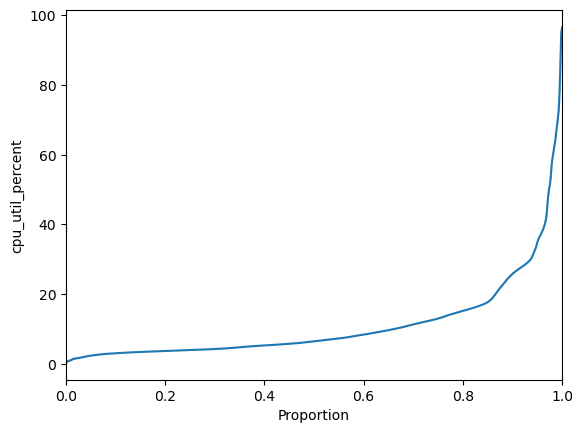

In [74]:
sns.ecdfplot(data=data, y="cpu_util_percent")

<Axes: xlabel='Proportion', ylabel='plan_cpu'>

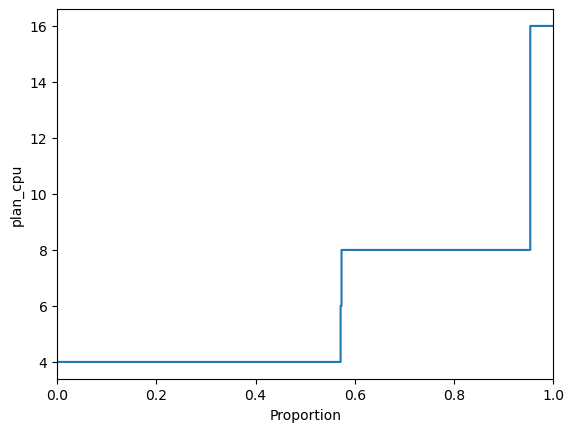

In [75]:
sns.ecdfplot(data=data, y="plan_cpu")

<Axes: >

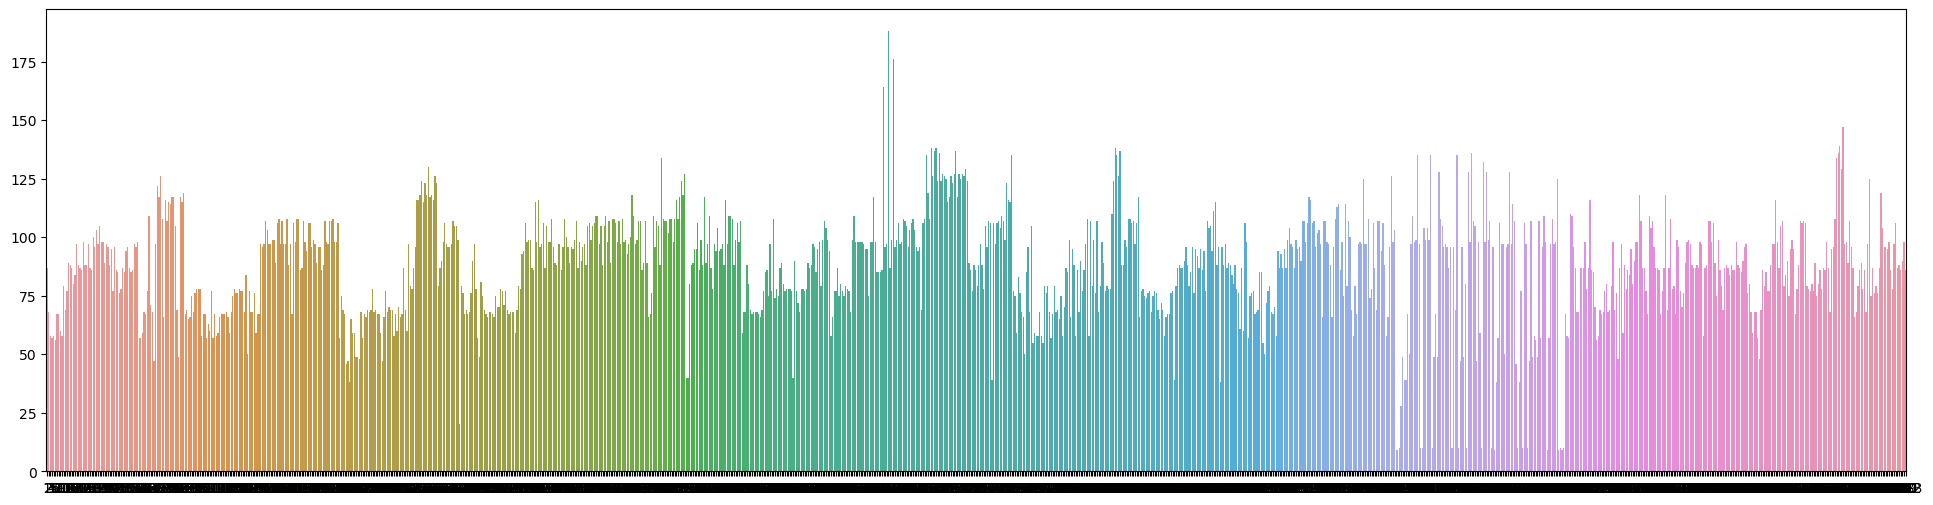

In [71]:
# d = {}
# for (x, g) in data.groupby(["machine_id"]):
#     # print(x, len(g))
#     d[int(x[0])] = len(g)

# fig, ax = plt.subplots(figsize=(24, 6))
# sns.barplot(x=list(d.keys()), y=list(d.values()), ax=ax)

In [73]:
pd.cut(data.cpu_util_percent, 4)

0        (0.204, 24.38]
1        (0.204, 24.38]
2        (0.204, 24.38]
3        (0.204, 24.38]
4        (0.204, 24.38]
              ...      
98608    (0.204, 24.38]
98609    (0.204, 24.38]
98610    (0.204, 24.38]
98611    (0.204, 24.38]
98612    (0.204, 24.38]
Name: cpu_util_percent, Length: 98613, dtype: category
Categories (4, interval[float64, right]): [(0.204, 24.38] < (24.38, 48.46] < (48.46, 72.54] < (72.54, 96.62]]

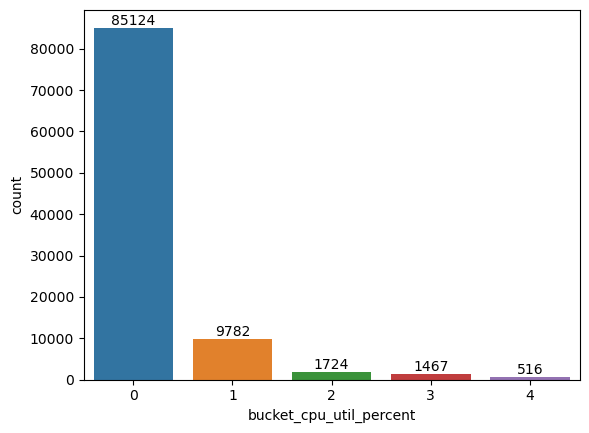

In [42]:
def plot_line(data, target):
    data_ = data.copy()
    data_["x"] = data_.index

    fig, ax = plt.subplots(figsize=(24, 8))
    sns.scatterplot(data=data_, y=target, x="x", ax=ax)
    return fig
    
def plot_hist_bar(
    dataset: pd.DataFrame, target: str
):
    fig, ax = plt.subplots()
    sns.countplot(
        x=target,
        data=dataset,
        ax=ax,
    )
    ax.bar_label(ax.containers[0])
    # ax.set_title(f"Train subset")
    # ax.set_xlabel("CPU avg")
    # ax.set_ylabel("Probability")
    # fig.savefig(output_path)
    # plt.close(fig)
    return fig

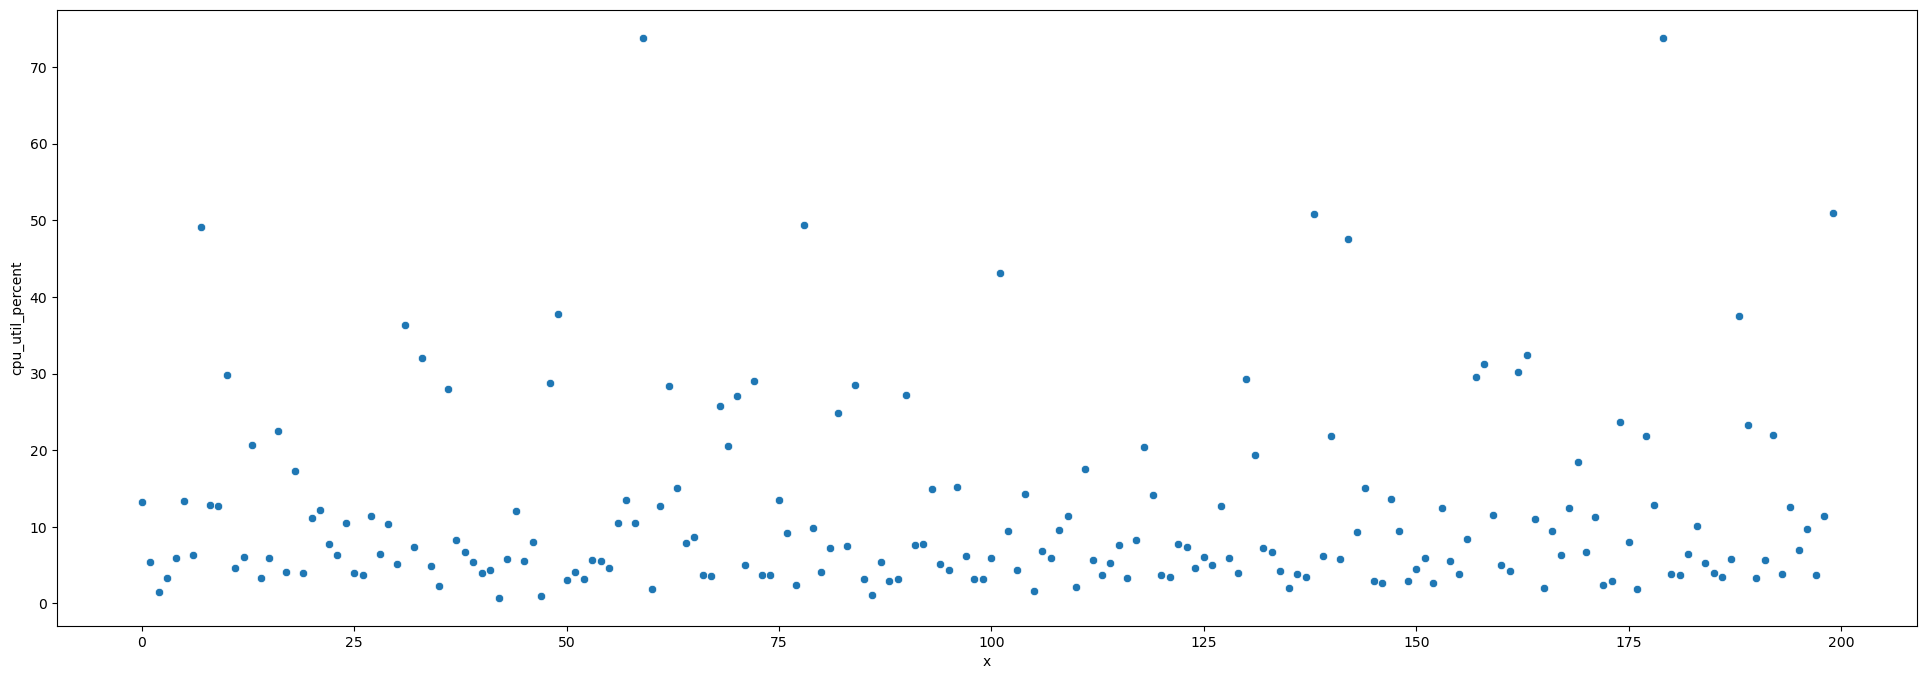

In [58]:
fig = plot_line(usage_df[0:200], "cpu_util_percent")

In [51]:
fig = plot_hist_bar(data, bucket_target)

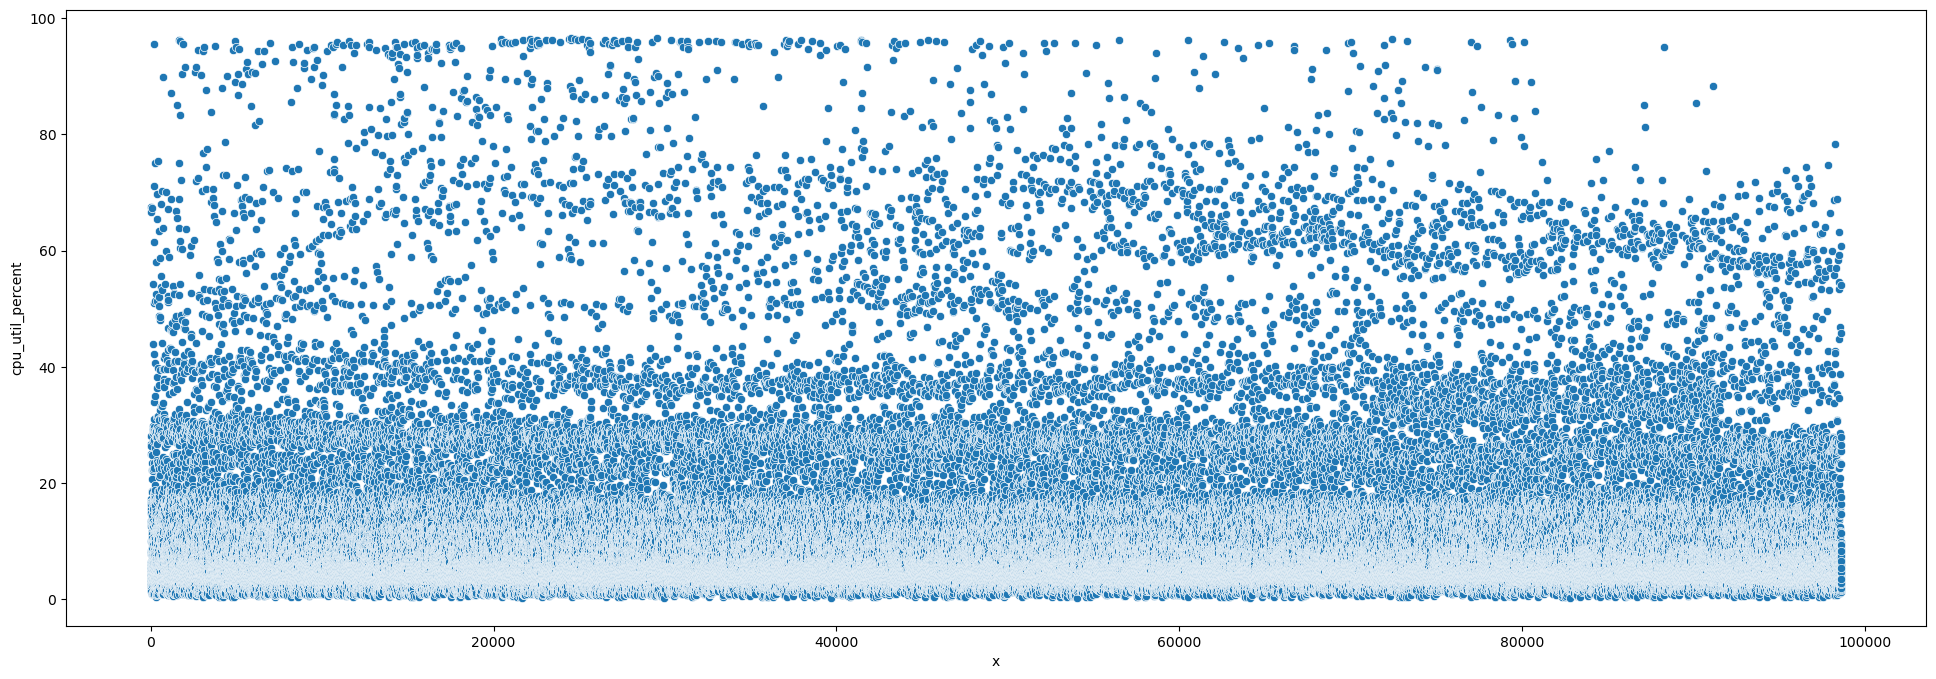

In [52]:
fig = plot_line(data, target_name)